In [76]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler;
import seaborn as sns;

In [77]:
df =pd.read_csv("./train.csv");
display(df.head(2));

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1


In [78]:
print("Number of rows=",len(df));

Number of rows= 41348


In [79]:
cols=df.columns.tolist();
print("Columns ",cols);

Columns  ['neighbourhood_group', 'room_type', 'minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365', 'price_class']


In [80]:
print("================= DATA TYPES ====================");
print(df.dtypes);

================= DATA TYPES ====================
neighbourhood_group     object
room_type               object
minimum_nights         float64
amenity_score          float64
number_of_reviews      float64
availability_365       float64
price_class              int64
dtype: object


In [81]:
target_col=df[["price_class"]];

display(target_col.head(2));
print("Unique Values==> ", df["price_class"].unique());

,price_class
0,3
1,1


Unique Values==>  [3 1 0 2]


In [82]:
null_values = df.isna();
print(null_values.sum());

neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64


In [83]:
#Replacing Categorical Features with Mode

mode_neighbourhood_group=df["neighbourhood_group"].mode()[0];
df["neighbourhood_group"].fillna(value=mode_neighbourhood_group,inplace=True);

mode_neighbourhood_group=df["room_type"].mode()[0];
df["room_type"].fillna(value=mode_neighbourhood_group,inplace=True);



/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_9172/1355574522.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["neighbourhood_group"].fillna(value=mode_neighbourhood_group,inplace=True);
/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_9172/1355574522.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [84]:
#Replacing Numerical Features with Median

minimum_nights_group=df["minimum_nights"].median();
df["minimum_nights"].fillna(value=minimum_nights_group,inplace=True);

mode_amenity_score=df["amenity_score"].median();
df["amenity_score"].fillna(value=mode_amenity_score,inplace=True);

mode_number_of_reviews=df["number_of_reviews"].median();
df["number_of_reviews"].fillna(value=mode_number_of_reviews,inplace=True);

mode_availability_365=df["availability_365"].median();
df["availability_365"].fillna(value=mode_availability_365,inplace=True);





/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_9172/3983291487.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["minimum_nights"].fillna(value=minimum_nights_group,inplace=True);
/var/folders/f_/248f3qgn79q0v2qgd7wh3csm0000gn/T/ipykernel_9172/3983291487.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [85]:
null_values = df.isna();
print(null_values.sum());

neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
price_class            0
dtype: int64


<Axes: ylabel='Frequency'>

[3 1 0 2]


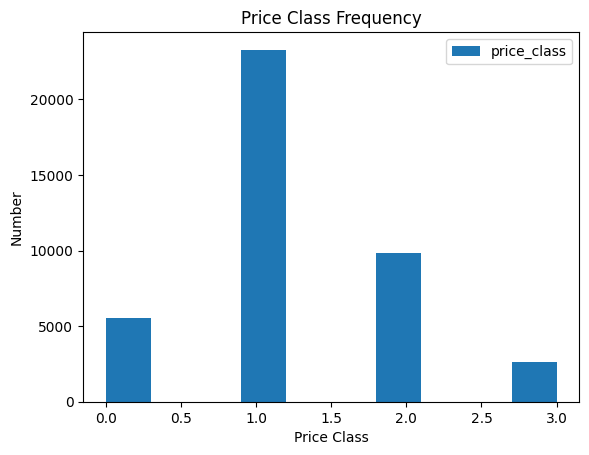

In [86]:
display(df[["price_class"]].plot.hist());
plt.xlabel("Price Class");
plt.ylabel("Number");
plt.title("Price Class Frequency");

print(df["price_class"].unique())

In [87]:
#Encode Categorical Variables
display(df[["neighbourhood_group"]].sample(2));
display(df[["room_type"]].sample(2));
df_encoded = pd.get_dummies(df);



,neighbourhood_group
3333,Brooklyn
26908,Brooklyn


,room_type
38239,Entire home/apt
10462,Entire home/apt


In [88]:
display(df_encoded.head(5));

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2.0,82.5,15.0,254.0,3,False,False,True,False,False,True,False,False
1,2.0,53.7,1.0,0.0,1,False,False,True,False,False,False,True,False
2,2.0,47.8,70.0,90.0,1,False,True,False,False,False,False,True,False
3,2.0,58.8,1.0,44.0,1,False,False,True,False,False,True,False,False
4,2.0,32.2,0.0,89.0,1,True,False,False,False,False,False,True,False


In [89]:
colums_to_scale=["minimum_nights","amenity_score","number_of_reviews","availability_365"];
scaler=StandardScaler();
df_encoded[colums_to_scale]=scaler.fit_transform(df_encoded[colums_to_scale]);

In [90]:
display(df_encoded.head(5));

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.251024,1.586358,-0.184981,1.095654,3,False,False,True,False,False,True,False,False
1,-0.251024,0.089685,-0.503065,-0.849587,1,False,False,True,False,False,False,True,False
2,-0.251024,-0.216925,1.064634,-0.160329,1,False,True,False,False,False,False,True,False
3,-0.251024,0.354721,-0.503065,-0.512616,1,False,False,True,False,False,True,False,False
4,-0.251024,-1.027623,-0.525785,-0.167987,1,True,False,False,False,False,False,True,False


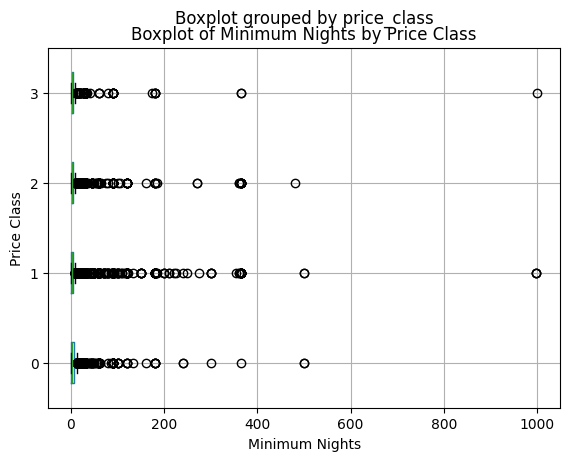

In [91]:

df.boxplot(column="minimum_nights", by="price_class", vert=False)
plt.xlabel("Minimum Nights");
plt.ylabel("Price Class");
plt.title("Boxplot of Minimum Nights by Price Class");

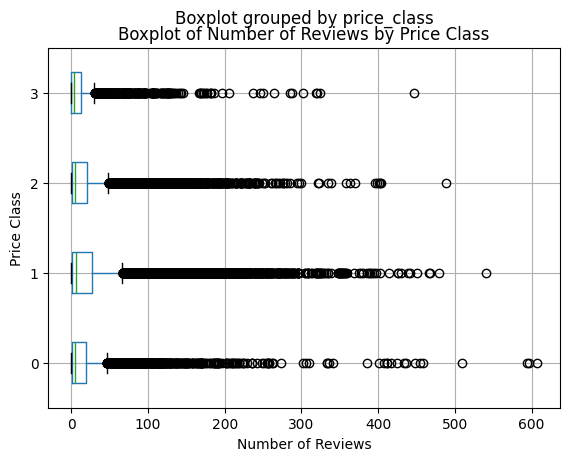

In [92]:
df.boxplot(column="number_of_reviews", by="price_class", vert=False)
plt.xlabel("Number of Reviews");
plt.ylabel("Price Class");
plt.title("Boxplot of Number of Reviews by Price Class");



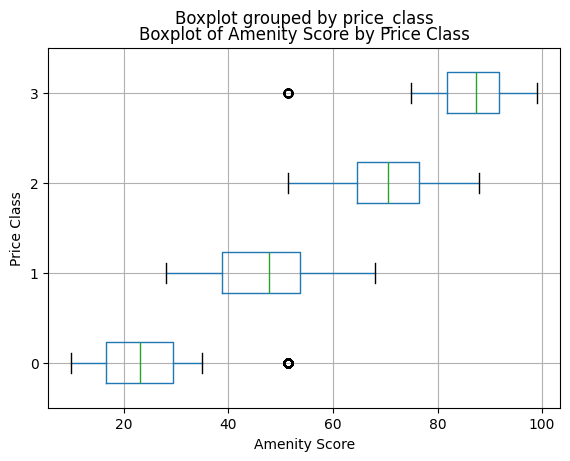

In [93]:


df.boxplot(column="amenity_score", by="price_class", vert=False)
plt.xlabel("Amenity Score");
plt.ylabel("Price Class");
plt.title("Boxplot of Amenity Score by Price Class");



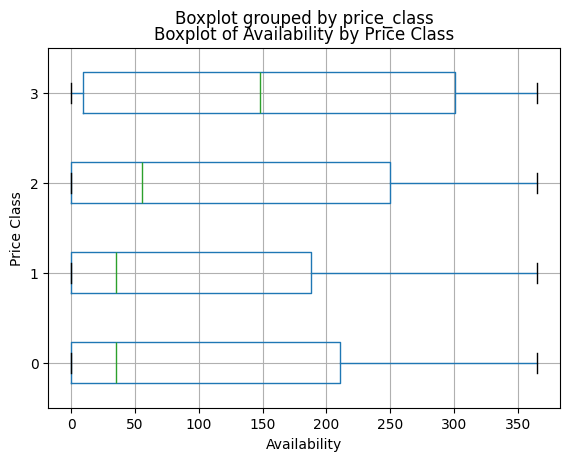

In [94]:
df.boxplot(column="availability_365", by="price_class", vert=False)
plt.xlabel("Availability");
plt.ylabel("Price Class");
plt.title("Boxplot of Availability by Price Class");

In [95]:
corr = df.corr(numeric_only=True);

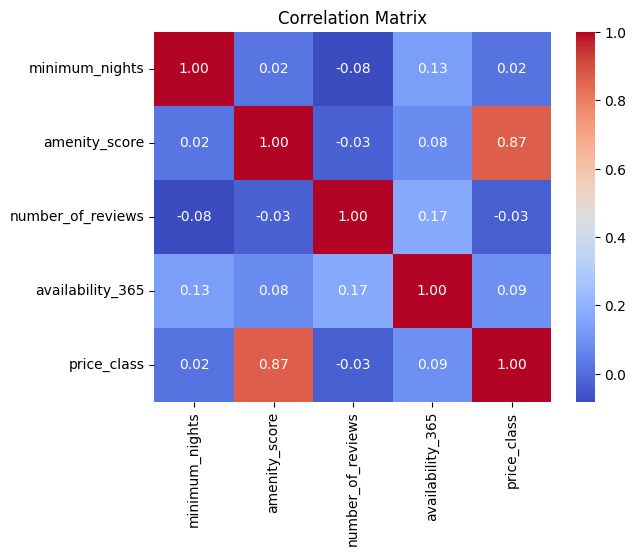

In [96]:
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix")
plt.show()

In [97]:
X = df_encoded.drop(columns=["price_class"]).values
y = df_encoded["price_class"].values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();

X_train = scaler.fit_transform(X_train);
X_val = scaler.transform(X_val);

In [99]:
def one_hot(y, num_classes):
    y_int = np.array(y).astype(int)
    return np.eye(num_classes)[y_int]

y_train = one_hot(y_train, 4);
y_val = one_hot(y_val, 4);

print(y_train.shape);

(33078, 4)


** PART B **

In [100]:
import numpy as np
import matplotlib.pyplot as plt


In [101]:
#Activation Function and their derivatives

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)


In [102]:
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)  
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_hat, y):
    return -np.mean(np.sum(y * np.log(y_hat + 1e-9), axis=1))


In [108]:
class TwoLayerMLP:
    def __init__(self, d, h1, h2, k, lr=0.05, activation="sigmoid"):
        self.lr = lr
        self.activation = activation

        if activation == "sigmoid":

            self.W1 = np.random.randn(d, h1) * np.sqrt(1/d)
            self.W2 = np.random.randn(h1, h2) * np.sqrt(1/h1)
            self.W3 = np.random.randn(h2, k) * np.sqrt(1/h2)

        else:  # ReLU

            self.W1 = np.random.randn(d, h1) * np.sqrt(2/d)
            self.W2 = np.random.randn(h1, h2) * np.sqrt(2/h1)
            self.W3 = np.random.randn(h2, k) * np.sqrt(2/h2)
        
        self.b1 = np.zeros((1, h1))
        self.b2 = np.zeros((1, h2))
        self.b3 = np.zeros((1, k))


    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1

        if self.activation == "sigmoid":
            self.a1 = sigmoid(self.z1)
        else:
            self.a1 = relu(self.z1)

        self.z2 = self.a1 @ self.W2 + self.b2      

        if self.activation == "sigmoid":
            self.a2 = sigmoid(self.z2)
        else:
            self.a2 = relu(self.z2)

        self.z3 = self.a2 @ self.W3 + self.b3
        self.y_hat = softmax(self.z3)

        return self.y_hat

    def backward(self, X, y):
        N = X.shape[0]

        delta3 = self.y_hat - y
        dW3 = self.a2.T @ delta3 / N
        db3 = np.sum(delta3, axis=0, keepdims=True) / N

        if self.activation == "sigmoid":
            delta2 = (delta3 @ self.W3.T) * sigmoid_derivative(self.z2)
            delta1 = (delta2 @ self.W2.T) * sigmoid_derivative(self.z1)
        else:
            delta2 = (delta3 @ self.W3.T) * relu_derivative(self.z2)
            delta1 = (delta2 @ self.W2.T) * relu_derivative(self.z1)

        dW2 = self.a1.T @ delta2 / N
        db2 = np.sum(delta2, axis=0, keepdims=True) / N

        dW1 = X.T @ delta1 / N
        db1 = np.sum(delta1, axis=0, keepdims=True) / N

        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

        return np.mean(np.abs(dW1)), np.mean(np.abs(dW2))
    
    def input_gradients(self, X, y_true):

        y_hat = self.forward(X)

        delta3 = (y_hat - y_true) / X.shape[0]

        delta2 = delta3 @ self.W3.T
        if self.activation == "sigmoid":
            delta2 *= sigmoid_derivative(self.z2)
        else:
            delta2 *= relu_derivative(self.z2)

        delta1 = delta2 @ self.W2.T
        if self.activation == "sigmoid":
            delta1 *= sigmoid_derivative(self.z1)
        else:
            delta1 *= relu_derivative(self.z1)

        dL_dx = delta1 @ self.W1.T

        return dL_dx

In [109]:
def accuracy(y_hat, y):
    pred = np.argmax(y_hat, axis=1)
    true = np.argmax(y, axis=1)
    return np.mean(pred == true)

In [110]:
def train(model, X_train, y_train, X_val, y_val, epochs=200):
    train_acc, val_acc = [], []
    g1_list, g2_list = [], []

    for i in range(epochs):
        y_hat = model.forward(X_train)
        loss = cross_entropy(y_hat, y_train)
            
        g1, g2 = model.backward(X_train, y_train)

        if i % 20 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")


        train_acc.append(accuracy(model.forward(X_train), y_train))
        val_acc.append(accuracy(model.forward(X_val), y_val))
        g1_list.append(g1)
        g2_list.append(g2) 

    return train_acc, val_acc, g1_list, g2_list;

In [111]:
X_train = np.array(X_train, dtype=np.float64)
X_val   = np.array(X_val,   dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)
y_val   = np.array(y_val,   dtype=np.float64)


d = X_train.shape[1]
k = 4

model_sigmoid = TwoLayerMLP(d, 32, 16, k, lr=0.05, activation="sigmoid")
sig_train, sig_val, g1_sig, g2_sig = train(model_sigmoid, X_train, y_train, X_val, y_val)

model_relu = TwoLayerMLP(d, 32, 16, k, lr=0.05, activation="relu")
relu_train, relu_val, g1_relu, g2_relu = train(model_relu, X_train, y_train, X_val, y_val)


Epoch 0, Loss: 1.3745
Epoch 20, Loss: 1.1366
Epoch 40, Loss: 1.1157
Epoch 60, Loss: 1.1081
Epoch 80, Loss: 1.1041
Epoch 100, Loss: 1.1011
Epoch 120, Loss: 1.0983
Epoch 140, Loss: 1.0955
Epoch 160, Loss: 1.0926
Epoch 180, Loss: 1.0896
Epoch 0, Loss: 1.7153
Epoch 20, Loss: 0.9625
Epoch 40, Loss: 0.8108
Epoch 60, Loss: 0.7254
Epoch 80, Loss: 0.6643
Epoch 100, Loss: 0.6163
Epoch 120, Loss: 0.5769
Epoch 140, Loss: 0.5443
Epoch 160, Loss: 0.5176
Epoch 180, Loss: 0.4958


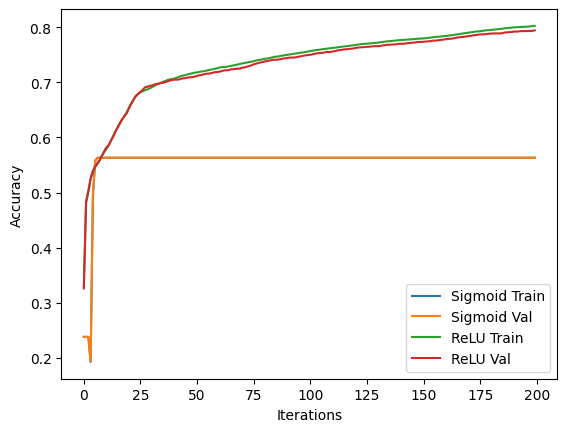

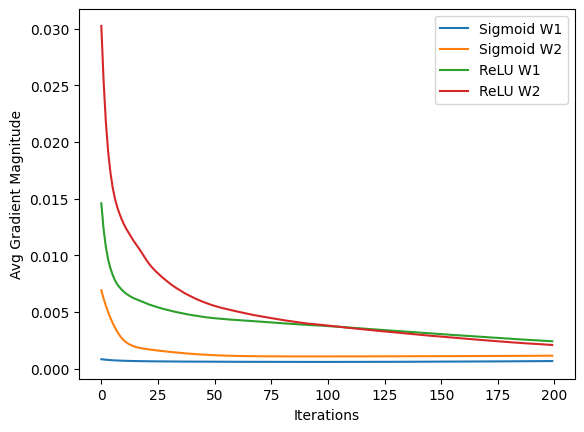

In [112]:
plt.plot(sig_train, label="Sigmoid Train")
plt.plot(sig_val, label="Sigmoid Val")
plt.plot(relu_train, label="ReLU Train")
plt.plot(relu_val, label="ReLU Val")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

plt.plot(g1_sig, label="Sigmoid W1")
plt.plot(g2_sig, label="Sigmoid W2")
plt.plot(g1_relu, label="ReLU W1")
plt.plot(g2_relu, label="ReLU W2")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Avg Gradient Magnitude")
plt.show()


PART C b


In [113]:

def compute_feature_importance(model, X, y):
    grads = model.input_gradients(X, y)

    importance = np.abs(grads)

    importance = importance.mean(axis=0)

    return importance


In [114]:
importance = compute_feature_importance(model_relu, X_train, y_train)

In [115]:
feature_names = df_encoded.drop(columns=["price_class"]).columns

ranking = sorted(zip(feature_names, importance),
                 key=lambda x: x[1],
                 reverse=True)

for i, (feat, score) in enumerate(ranking, 1):
    print(f"{i}. {feat}: {score:.6f}")


1. amenity_score: 0.000021
2. room_type_Entire home/apt: 0.000007
3. neighbourhood_group_Staten Island: 0.000005
4. availability_365: 0.000005
5. neighbourhood_group_Bronx: 0.000005
6. neighbourhood_group_Manhattan: 0.000005
7. room_type_Private room: 0.000004
8. neighbourhood_group_Brooklyn: 0.000004
9. room_type_Shared room: 0.000003
10. number_of_reviews: 0.000003
11. neighbourhood_group_Queens: 0.000003
12. minimum_nights: 0.000002


PART D

In [ ]:
df_test = pd.read_csv("test.csv")

# Apply SAME encoding as training
df_test_encoded = pd.get_dummies(df_test)

# IMPORTANT:
# Make sure test columns match train columns
df_test_encoded = df_test_encoded.reindex(columns=df_encoded.columns, fill_value=0)

# Use TRAINING scaler (DO NOT fit again)
df_test_encoded[colums_to_scale] = scaler.transform(
    df_test_encoded[colums_to_scale]
)


X_test = df_test_encoded.drop(columns=["price_class"]).values.astype(np.float64);
y_test = df_test_encoded["price_class"].values.astype(int);



In [128]:
print(X_test);

[[-0.21393984259540788 1.1665568260945982 2.252721989577454 ... True
  False False]
 [-0.004472389903977621 0.9808248972063304 -0.5125768935940063 ... False
  True False]
 [-0.17204635205712185 1.6618419697966462 -0.14241877537420453 ... False
  True False]
 ...
 [-0.21393984259540788 0.5977527938742773 -0.44725487273168835 ... True
  False False]
 [-0.25583333313369394 -1.15122286982358 -0.033548740603674604 ... False
  True False]
 [0.12120808171088054 -1.5497726338963218 -0.5125768935940063 ... False
  False True]]


In [129]:
def evaluate_accuracy(model, X, y_true):
    probs = model.forward(X)

    y_pred = np.argmax(probs, axis=1)

    if y_true.ndim > 1:
        y_true = np.argmax(y_true, axis=1)

    acc = (y_pred == y_true).mean()
    return acc


In [130]:
train_acc = evaluate_accuracy(model_relu, X_train, y_train)
val_acc   = evaluate_accuracy(model_relu, X_val, y_val)
test_acc  = evaluate_accuracy(model_relu, X_test, y_test)

print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method